### Just Visiting

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_V4.csv")

In [4]:
data.drop("Unnamed: 0", axis =1, inplace = True)

In [5]:
data.head()

,Name of Covered Entity,State,Covered Entity Type,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,2009,2010,2011,2012,2013,2014,2015,2016,Individuals_Affected,YEAR
0,Advantage Consolidated LLC,OR,Healthcare Provider,2015-03-18,Hacking/IT Incident,Other,No,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,151626,2015
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,2014-06-12,Hacking/IT Incident,Other,Yes,\N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1831,2014
2,"Goshen Health System, Inc.",IN,Healthcare Provider,2012-02-14,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,660,2012
3,Group Life Hospital and Medical Program,CT,Health Plan,2016-02-29,Hacking/IT Incident,Other,No,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3000,2016
4,"Health Incent, LLC",TN,Healthcare Provider,2016-07-11,Hacking/IT Incident,Other,No,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1100,2016


In [6]:
data.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,Individuals_Affected,YEAR
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1.658000e+03,1658.000000
mean,0.010856,0.118818,0.114596,0.123040,0.156212,0.170688,0.161037,0.144753,1.034313e+05,2013.174910
std,0.103658,0.323672,0.318630,0.328582,0.363166,0.376349,0.367676,0.351957,1.990474e+06,1.978349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,2009.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,2012.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.345000e+03,2013.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.796000e+03,2015.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.880000e+07,2016.000000


**PROCEDURE SUGGESTED :**
* Covered entity type : convert to one hot encoding
* Type of Breach : convert into one hot encodings
* Location of Breached Information : convert to one hot encoding.
* Individuals affected : keep as it is
* Years : 2009 - 2016 : keepas it is.

### Pre EDA & Data Preparaation

### For One Hot Encoding of Breach Location

In [9]:
breach_loclist = []

for i in data['Location of Breached Information'].unique():
    breach_loca = (str(i).split(','))
    breach_loclist.append(breach_loca)
    
final_loca = []
for i in breach_loclist:
    for j in i:
        final_loca.append(j.strip())
        
final_loca = set(final_loca)
final_loca

{'Desktop Computer',
 'Electronic Medical Record',
 'Email',
 'Laptop',
 'Network Server',
 'Other',
 'Other Portable Electronic Device',
 'Paper/Films'}

**FOR "['Desktop Computer']" LOCATIOn**

In [13]:
# fetching all the composite unique types that contain "THEFT"
loc_list = []
for loca in data['Location of Breached Information'].unique():
    if loca.find('Desktop Computer') != -1:
        
        loc_list.append(loca)
        
# fetching all the rows that contain "Theft" in their breach type
# data['Desktop Computer'] = data[data['Location of Breached Information'].isin(loc_list)]

data['Desktop Computer'] = np.where( data['Location of Breached Information'].isin(loc_list) , 1, 0)

In [15]:
data['Desktop Computer'].value_counts()

0    1452
1     206
Name: Desktop Computer, dtype: int64

**FOR "Electronic Medical Record"**

In [16]:
# fetching all the composite unique types that contain "THEFT"
loc_list = []
for loca in data['Location of Breached Information'].unique():
    if loca.find('Electronic Medical Record') != -1:
        
        loc_list.append(loca)
        
# fetching all the rows that contain "Theft" in their breach type
# data['Desktop Computer'] = data[data['Location of Breached Information'].isin(loc_list)]

data['Electronic Medical Record'] = np.where( data['Location of Breached Information'].isin(loc_list) , 1, 0)
data['Electronic Medical Record'].value_counts()

0    1555
1     103
Name: Electronic Medical Record, dtype: int64

In [17]:
final_loca = list(final_loca)

In [18]:
for location in final_loca:
    print("FOR ", location)
    # fetching all the composite unique types that contain "THEFT"
    loc_list = []
    for loca in data['Location of Breached Information'].unique():
        if loca.find(location) != -1:

            loc_list.append(loca)

    # fetching all the rows that contain "Theft" in their breach type
    # data['Desktop Computer'] = data[data['Location of Breached Information'].isin(loc_list)]

    data[location] = np.where( data['Location of Breached Information'].isin(loc_list) , 1, 0)
    print(data[location].value_counts())
    print(data[location].isnull().any())

FOR  Electronic Medical Record
0    1555
1     103
Name: Electronic Medical Record, dtype: int64
False
FOR  Desktop Computer
0    1452
1     206
Name: Desktop Computer, dtype: int64
False
FOR  Other
0    1290
1     368
Name: Other, dtype: int64
False
FOR  Paper/Films
0    1235
1     423
Name: Paper/Films, dtype: int64
False
FOR  Laptop
0    1307
1     351
Name: Laptop, dtype: int64
False
FOR  Email
0    1501
1     157
Name: Email, dtype: int64
False
FOR  Network Server
0    1382
1     276
Name: Network Server, dtype: int64
False
FOR  Other Portable Electronic Device
0    1475
1     183
Name: Other Portable Electronic Device, dtype: int64
False


In [19]:
data[final_loca]

,Electronic Medical Record,Desktop Computer,Other,Paper/Films,Laptop,Email,Network Server,Other Portable Electronic Device
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1653,0,0,0,0,0,1,0,0
1654,1,0,0,0,0,0,0,0
1655,0,0,0,1,0,0,0,0
1656,0,0,0,0,0,0,1,0


### For ONE HOT Encoding of Breach Types

In [21]:
types_breach = []

for i in data['Type of Breach'].unique():
    breach_type = (str(i).split(','))
    types_breach.append(breach_type)
    
final_types = []
for i in types_breach:
    for j in i:
        final_types.append(j.strip())
        
final_types = set(final_types)
final_breach_types = list(final_types)

In [23]:
for location in final_breach_types:
    print("FOR ", location)
    # fetching all the composite unique types that contain "THEFT"
    loc_list = []
    for loca in data['Type of Breach'].unique():
        if loca.find(location) != -1:

            loc_list.append(loca)

    # fetching all the rows that contain "Theft" in their breach type
    # data['Desktop Computer'] = data[data['Location of Breached Information'].isin(loc_list)]

    data[location] = np.where( data['Type of Breach'].isin(loc_list) , 1, 0)
    print(data[location].value_counts())
    print(data[location].isnull().any())

FOR  Other
0    1561
1      97
Name: Other, dtype: int64
False
FOR  Hacking/IT Incident
0    1427
1     231
Name: Hacking/IT Incident, dtype: int64
False
FOR  Loss
0    1510
1     148
Name: Loss, dtype: int64
False
FOR  Improper Disposal
0    1598
1      60
Name: Improper Disposal, dtype: int64
False
FOR  Unauthorized Access/Disclosure
0    1223
1     435
Name: Unauthorized Access/Disclosure, dtype: int64
False
FOR  Theft
0    889
1    769
Name: Theft, dtype: int64
False
FOR  Unknown
0    1645
1      13
Name: Unknown, dtype: int64
False


In [24]:
data.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'Individuals_Affected', 'YEAR', 'Desktop Computer',
       'Electronic Medical Record', 'Other', 'Paper/Films', 'Laptop', 'Email',
       'Network Server', 'Other Portable Electronic Device',
       'Hacking/IT Incident', 'Loss', 'Improper Disposal',
       'Unauthorized Access/Disclosure', 'Theft', 'Unknown'],
      dtype='object')

### For One HOT Encoding Covered entity types

In [25]:
types_breach = []

for i in data['Covered Entity Type'].unique():
    breach_type = (str(i).split(','))
    types_breach.append(breach_type)
    
final_types = []
for i in types_breach:
    for j in i:
        final_types.append(j.strip())
        
final_types = set(final_types)
final_breach_types = list(final_types)

In [26]:
for location in final_breach_types:
    print("FOR ", location)
    # fetching all the composite unique types that contain "THEFT"
    loc_list = []
    for loca in data['Covered Entity Type'].unique():
        if loca.find(location) != -1:

            loc_list.append(loca)

    # fetching all the rows that contain "Theft" in their breach type
    # data['Desktop Computer'] = data[data['Location of Breached Information'].isin(loc_list)]

    data[location] = np.where( data['Covered Entity Type'].isin(loc_list) , 1, 0)
    print(data[location].value_counts())
    print(data[location].isnull().any())

FOR  Healthcare Clearing House
0    1654
1       4
Name: Healthcare Clearing House, dtype: int64
False
FOR  Business Associate
0    1384
1     274
Name: Business Associate, dtype: int64
False
FOR  Health Plan
0    1451
1     207
Name: Health Plan, dtype: int64
False
FOR  Healthcare Provider
1    1173
0     485
Name: Healthcare Provider, dtype: int64
False


### For final Data Checking

In [27]:
data.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'Individuals_Affected', 'YEAR', 'Desktop Computer',
       'Electronic Medical Record', 'Other', 'Paper/Films', 'Laptop', 'Email',
       'Network Server', 'Other Portable Electronic Device',
       'Hacking/IT Incident', 'Loss', 'Improper Disposal',
       'Unauthorized Access/Disclosure', 'Theft', 'Unknown',
       'Healthcare Clearing House', 'Business Associate', 'Health Plan',
       'Healthcare Provider'],
      dtype='object')

In [28]:
len(data.columns)

36

In [29]:
data['Business Associate Present'].value_counts()

No     1378
Yes     280
Name: Business Associate Present, dtype: int64

In [33]:
# Introducing the TARGET COLUMN
data["target"] = np.where( data['Business Associate Present'] == "Yes" , 1, 0)

In [34]:
data["target"].value_counts()

0    1378
1     280
Name: target, dtype: int64

**HENCE -> HIGHLY IMBALANCED**

In [35]:
len(data.columns)

37

In [36]:
data.to_csv("Data_V5.csv")

### Working on "Web Description"

In [38]:
desc_list = data['Web Description'].unique()

In [39]:
len(desc_list)

667

In [41]:
desclen_list = [] # list to store the length of web description
for desc in desc_list:
    desclen_list.append(len(str(desc)))

In [44]:
pd.DataFrame(desclen_list).describe()

,0
count,667.000000
mean,916.566717
std,418.815077
min,2.000000
25%,700.000000
50%,853.000000
75%,1068.500000
max,3799.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa6ba302c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa6ba66a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa6bbd5ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa6badbd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa6bade488>],
 'means': []}

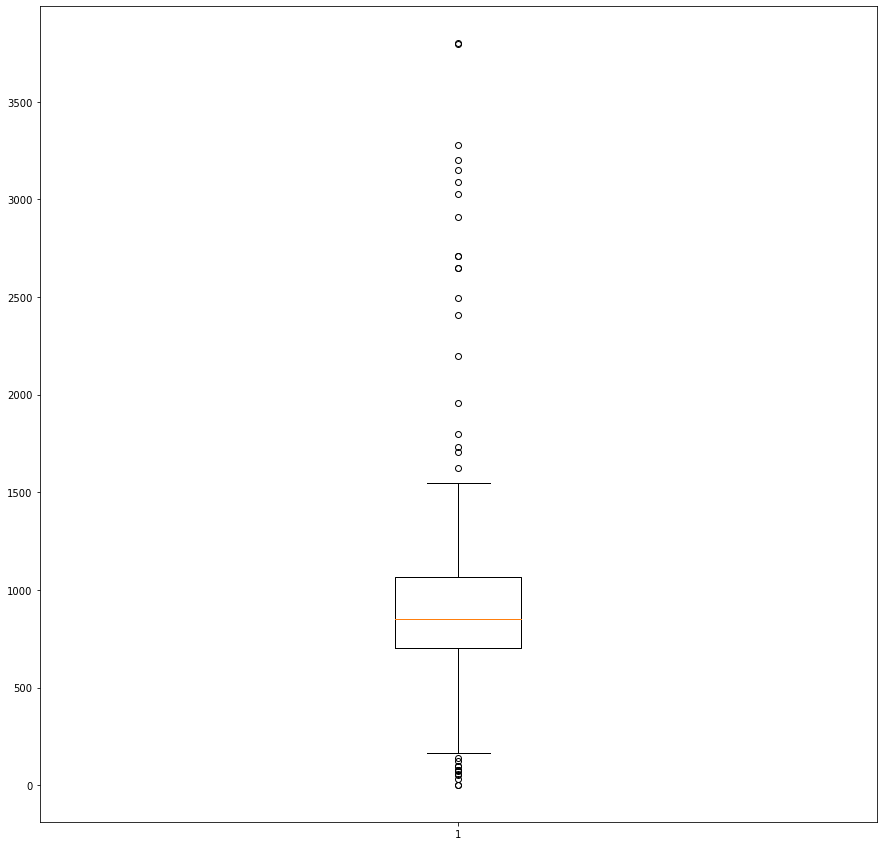

In [49]:
plt.figure(figsize = (15,15))
plt.boxplot(pd.Series(desclen_list))

**Hence, WE CAN DELETE THE REVIEWS WITH SIZE <100 TO REMOVE ANY NOISY DATA**

In [58]:
desc_df = pd.DataFrame({"Desc": desc_list, "Desc_len": desclen_list})

In [59]:
desc_df

,Desc,Desc_len
0,NaN,3
1,\N,2
2,Computer servers of Goshen Health System's bus...,1385
3,"On December 13, 2014, the covered entity (CE),...",721
4,"On December 30, 2014, the covered entity (CE),...",896
...,...,...
662,"On July 7, 2014, Memorial Hermann Health Syste...",692
663,The covered entity (CE) reported unauthorized ...,509
664,A newly hired employee impermissibly took pati...,524
665,The covered entity (CE) misplaced a binder con...,597


In [60]:
desc_df['Desc'] = np.where( desc_df['Desc_len'] < 50 , np.nan, desc_df['Desc'])

In [62]:
desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Desc      664 non-null    object
 1   Desc_len  667 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ KB


In [63]:
desc_df.dropna(inplace = True)

In [64]:
desc_df.shape

(664, 2)

In [70]:
word_list = []

for desc in desc_df["Desc"]:
    words = desc.split(" ")
    for word in words:
        word_list.append(word.strip())
        
word_list = list(set(word_list))

In [72]:
len(word_list)

7114

**Involving NLP concepts will take time :**
* Hence we will currently only utilise rest of the features.